<!-- ![my_picture](https://www.fatalerrors.org/images/blog/c6b544ae87e97d71cb450e434a8818a6.jpg) -->
<image src="https://www.fatalerrors.org/images/blog/c6b544ae87e97d71cb450e434a8818a6.jpg" width="500px">

- apple width=6cm
- apple length=6cm
- banana width=4cm
- banana length=8cm

assume:
apple : 0

banana: 1

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [244]:
def generate_dataset(n):
    apple_width=np.random.normal(6,1,n)
    apple_length=np.random.normal(6,1,n)
    banana_width=np.random.normal(4,1,n)
    banana_length=np.random.normal(8,1,n)
    width = np.concatenate((apple_width,banana_width))
    length= np.concatenate((apple_length,banana_length))
    X= np.array([width,length]).T

    Y_apples=np.zeros(n,dtype='int')
    Y_bananas=np.ones(n,dtype='int')
    Y=np.concatenate((Y_apples,Y_bananas))
    return X,Y

In [245]:
X_train, Y_train=generate_dataset(100)

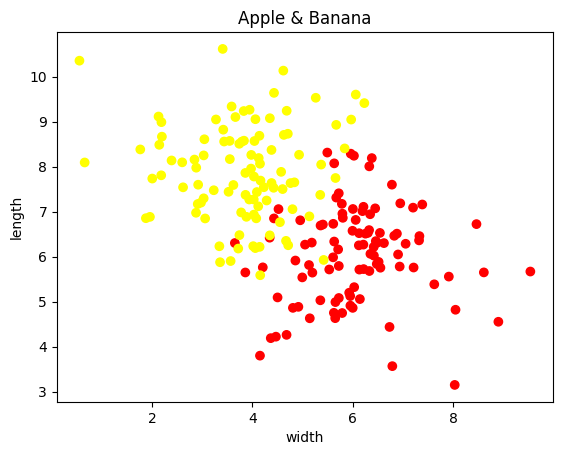

In [246]:
cmap=['red','yellow']
plt.scatter(X_train[:,0],X_train[:,1], c=Y_train, cmap=ListedColormap(cmap))
plt.title("Apple & Banana")
plt.xlabel("width")
plt.ylabel("length")
plt.show()

In [247]:
from knn import KNN

In [248]:
knn=KNN(k=5)
knn.fit(X_train,Y_train)

In [249]:
new_fruit=np.array([3,8.4])
new_fruit2=np.array([6,6])
new_fruit3=np.array([4,7])
new_fruits=[new_fruit,new_fruit2,new_fruit3]

outputs=knn.predict(new_fruits)

In [250]:
for output in outputs:
    if output==0:
        print("🍎")
    elif output==1:
        print("🍌")

🍌
🍎
🍌


In [251]:
X_test,Y_test = generate_dataset(90)

In [252]:
knn.evaluate(X_test,Y_test)

0.8722222222222222

In [253]:
Y_pred=knn.predict(X_test)
# Y_pred

In [254]:
confusion_matrix= np.zeros((2,2))

for i in range(180):
    if Y_test[i] == 0 and Y_pred[i]==0:
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_pred[i]==1:
        confusion_matrix[0][1] += 1
    elif Y_test[i] == 1 and Y_pred[i]==0:
        confusion_matrix[1][0] += 1
    elif Y_test[i] == 1 and Y_pred[i]==1:
        confusion_matrix[1][1] += 1

confusion_matrix

array([[77., 13.],
       [10., 80.]])

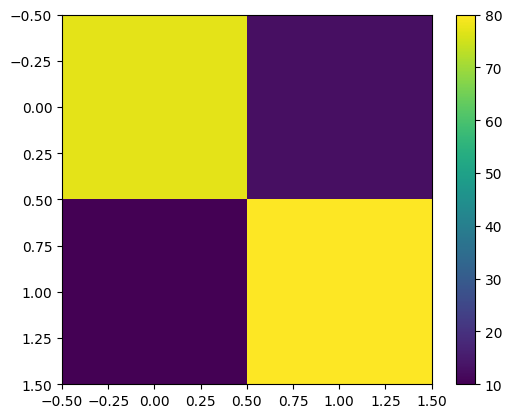

In [255]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

حل مساله با استفاده از کتابخانه sikit-learn

In [256]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
knn.predict(new_fruits)

array([1, 0, 1])

In [257]:
knn.score(X_test,Y_test)

0.8722222222222222